In [1]:
from pathlib import Path

root_img_dir = Path("/local/scratch/datasets/moth-wasp-snake/")
image_paths = []
for root, dirs, paths in root_img_dir.walk():
    for p in paths:
        image_paths.append(str(Path(root) / p))
        
image_paths

['/local/scratch/datasets/moth-wasp-snake/Snake1.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp4.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp2.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake5.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp5.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake2.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp3.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp1.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake4.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake3.png']

Plotting PCA images: 10it [00:00, 77.86it/s]


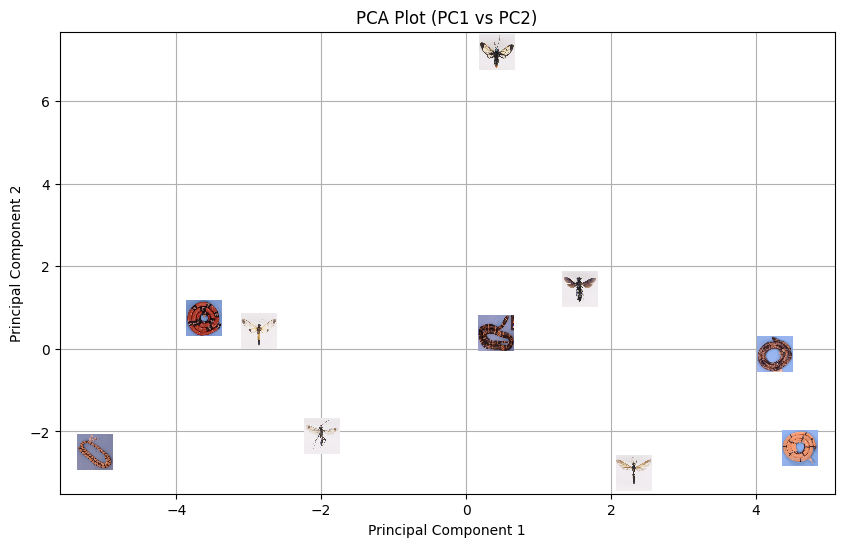

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mimicry_madness.viz import create_pca_image_plot

extracted_features = np.random.rand(len(image_paths), 50)

fig, ax = create_pca_image_plot(extracted_features, image_paths, pca_x=0, pca_y=1, plt_img_size=(256, 256), zoom=0.1)
plt.show()